In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

I had the idea to make art by creating scaleograms from poetry, by applying wavelet transforms. For this I want to represent the poem on mathematics producd by "Truls electronic bard" in the short story by Lem as a scalogram.

In [330]:
#read the raw poem
with open("poem_electronic_bard", "r") as f:
    raw_poem = f.readlines()

I will harvest the individual phonemes from all the words, and assign these phonems a value based on their rate of occurence in the poem.

In [344]:
poem = []
for line in raw_poem:
    for word in line.split(" "):
        phones = pronouncing.phones_for_word(word)
        for phone in phones:
            for p in phone.split(" "):
                poem.append(p)

Then we can count the values of the unique phonemes, and assing each phoneme this value. There is likely a better way butI have to start somewhere.

In [345]:
poem = pd.Series(poem)

frqs = poem.value_counts()

ts = [frqs[x] for x in poem]

This is where we have a numerical timeseries that represents the poem.

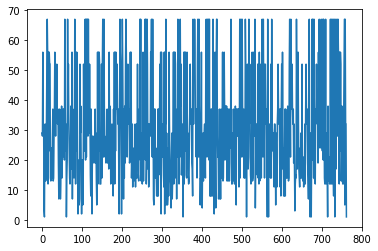

In [346]:
fig, ax = plt.subplots()
ax.plot(ts)

And we can apply a wavelet transform to that:

In [350]:
wt = pywt.cwt(np.array(ts), scales = np.arange(1,50), wavelet = "morl")

In [351]:
import seaborn as sns

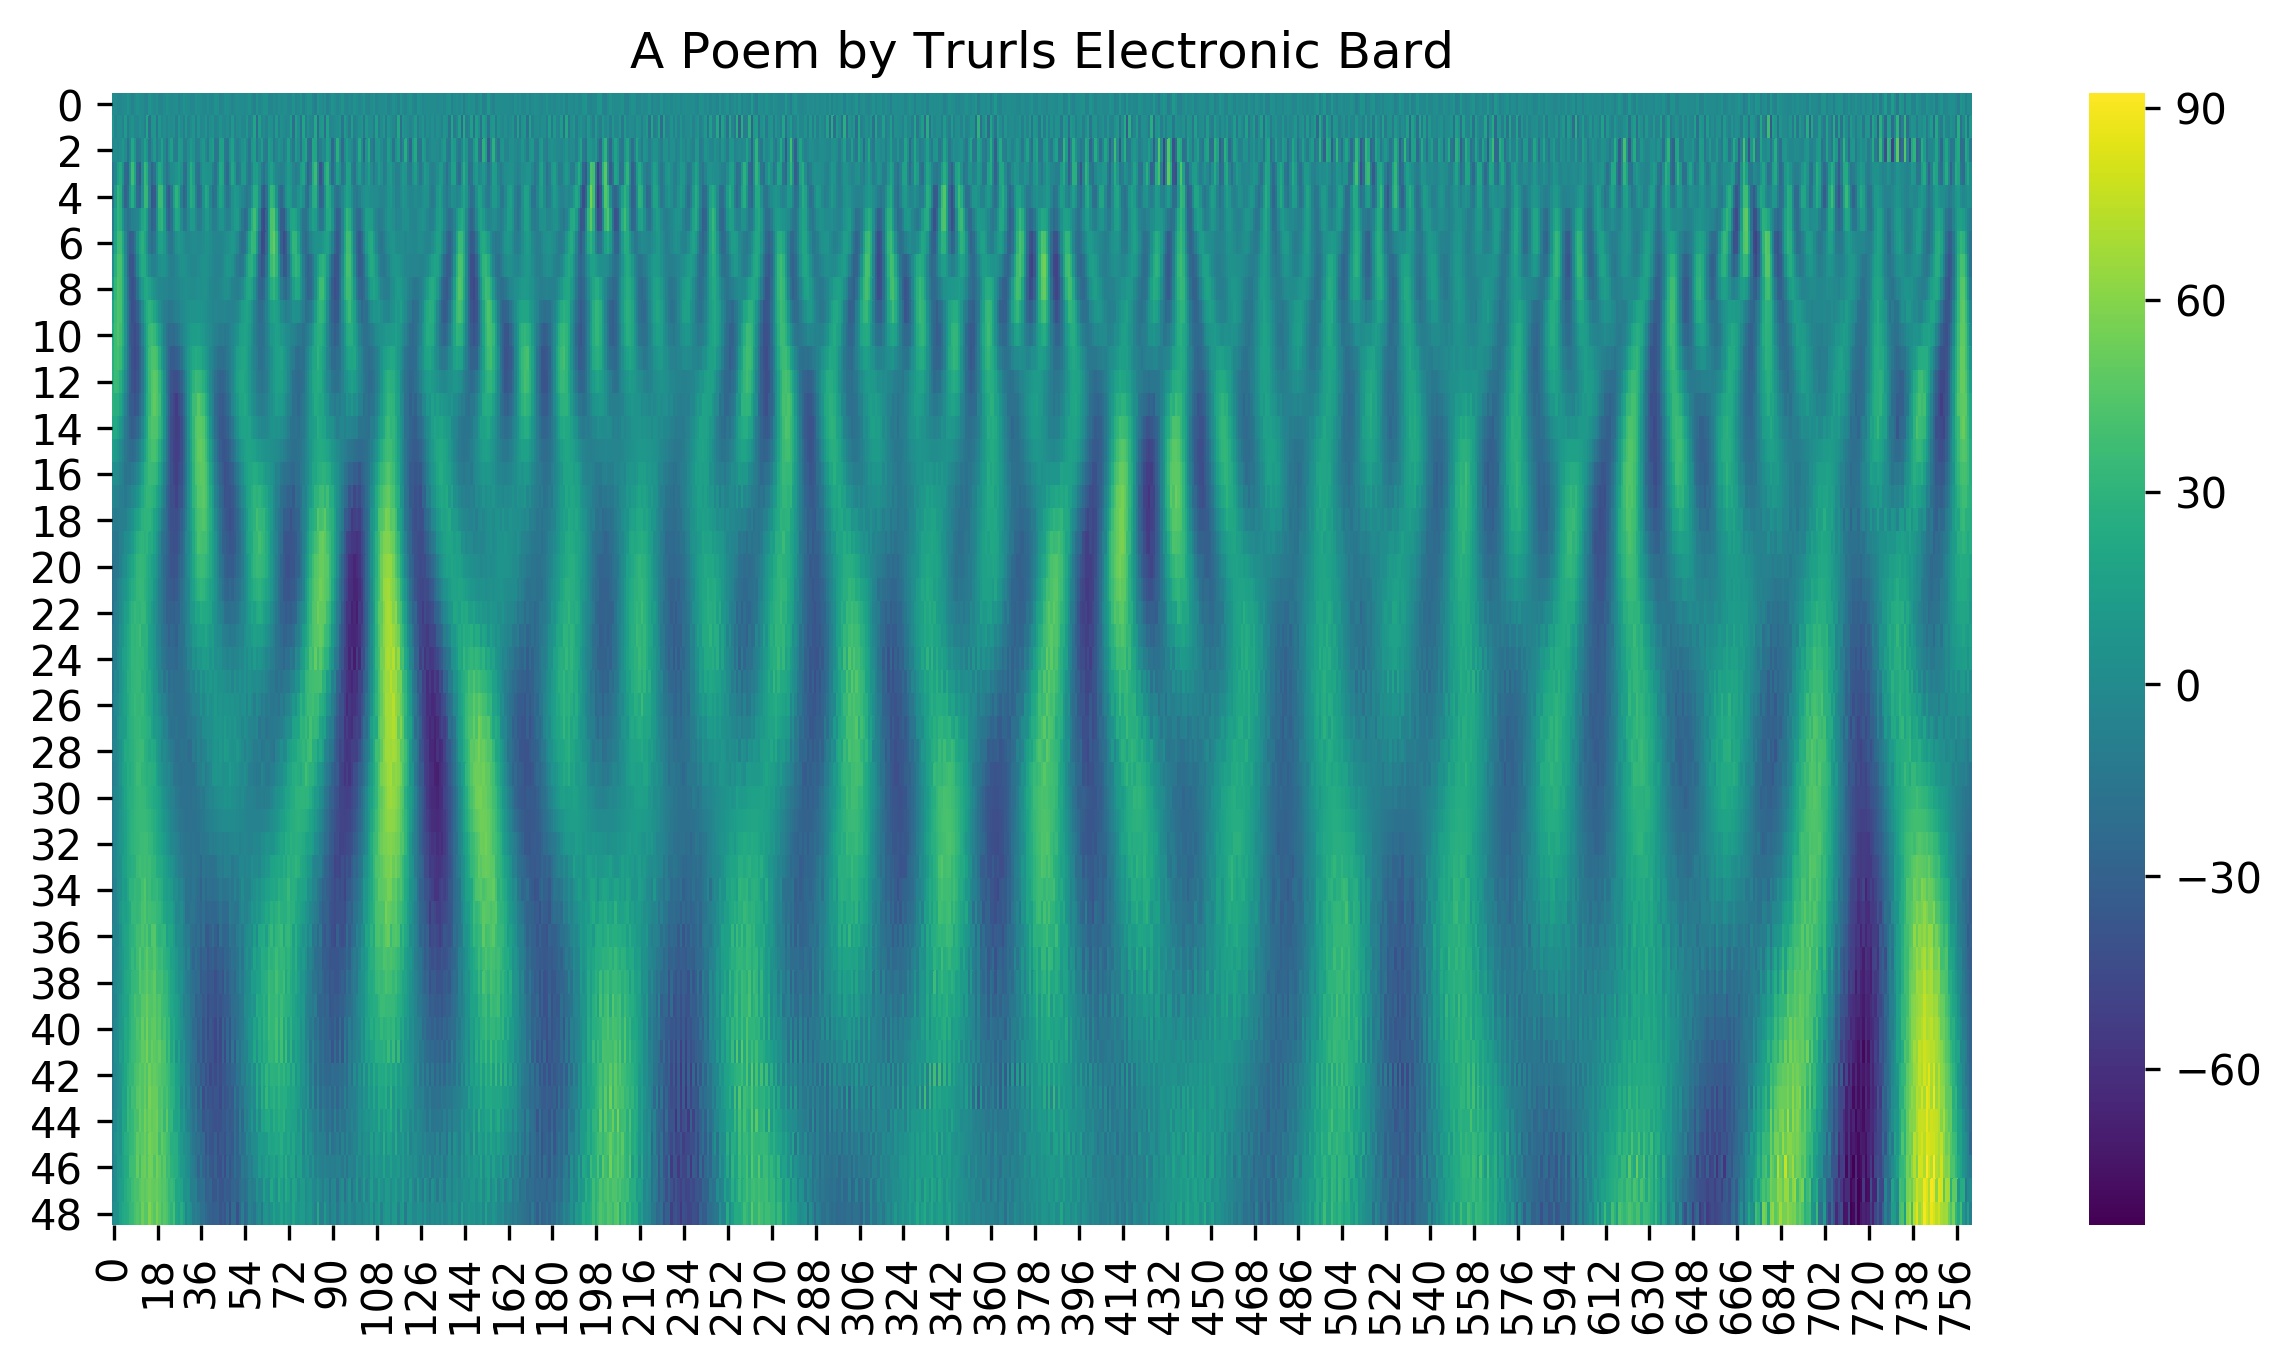

In [355]:
fig, ax = plt.subplots(figsize = (10, 5), dpi = 300)
sns.heatmap(wt[0], ax = ax, cmap = "viridis")
ax.set_title("A Poem by Trurls Electronic Bard");

In [356]:
fig.savefig("scalogram.png")